# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The Movie Database (TMDB) is a data set which includes the records of 10,000 movies that have been releases over a 56 year period and various attributes of said movies.

>**Column names**:  

>`id` - identification number 
`imdb_id` - unique movie identification code  
`popularity`  - popularity ratings in numeric value  
`budget` - amount spent in dollars  
`revenue` - amount generated from movie in dollars  
`original_title` - name of movie  
`cast` - name of main actors  
`homepage` - webpage of movie  
`director` - director of movie     
`tagline` - unique to each movie  
`overview` - brief description of movie  
`runtime` - total time the movie runs in numeric value  
`genres` - genre of movie  
`production_companies` - list(s) of companies who produced movie  
`release_date` - date movie was released in date format  
`vote_count`  - total vote counts in numeric format  
`vote_average` - average vote in numeric format  
`release_year` - year movie was released  
`budget_adj` - budget of the associated movie
in terms of 2010 dollars, accounting for inflation over
time.  
`revenue_adj` - revenue of the associated movie
in terms of 2010 dollars, accounting for inflation over
time. 



### Question(s) for Analysis
1. Which movie titles had the highest revenue?
2. Which movie titles had the highest profit? 
3. Which companies have made the highest total profit from movies of all time?
4. Which companies have spent the highest total budget from movies of all time?
5. Which movies are the most popular of all time?
6. Which directors are most sought after to make movies?
7. Are these same directors ususally associated with more popular movies?
8. What is the trend in movie popularity over the years?
9. Is there a correlation between vote_count and profit?
10. What kinds of properties are associated with the more profitable movies?
11. Given the budget of movies at when it was made and its values as at 2010, is the economy getting better or worse for the movie industry? Is it affecting the profit made by movies compared to their value as at 2010?


### Importing neccessary packages

In [1]:
# Import and alias the packages to be used for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data

df = pd.read_csv('tmdb-movies.csv')

In [4]:
# Print out the first 10 lines for inspection

df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
# Check the number rows and columns within the data

df.shape

(10866, 21)

In [6]:
# Inspect the data types of the columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Check for null vaues if any exist with our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Check for the number of nulls within each field

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Determine the number of unique values in each column

df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Determine the number of duplicates

df.duplicated().sum()

1

In [11]:
# Check the summary statistics of the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Assessment of the data
 - Missing values in `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies` (NaN)
 - Some columns won't not useful in identifying trends or answering our questions
 - Duplicate row of data
 - The column `release_date` is in the string datatype but ideally should be in datetime
 - Absence of profit generated by the movie which is essential in answering our questions


### Data Cleaning
> The data contains 10866 rows and 12 columns with one duplicated row of data(which needs to be removed). The column names are explanatory enough and easy to work with, however, `budget_adj` and `revenue_adj` will be changed to more explanatory names. Some columns specific to movie and not particularly useful in finding trends were discovered, these will be removed.`release_date` will be converted to the proper datatype. Analysis of profit generated from movies is essential. This field will have to be created

#### Dropping duplicates


In [12]:
# Drop duplicate entries

df.drop_duplicates(inplace = True)

In [13]:
# Check if duplicate has been dropped successfully

df.shape

(10865, 21)

The rows reduced from 10866 to 10865 which indicates that the duplicate has been successfully dropped

#### Dropping columns and rows


In [14]:
# Dropping columns that are specific to movie or not useful in this analysis

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis = 1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

Columns successfully dropped

In [16]:
# checking for nulls
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Nulls were found in 4 columns, further analysis carried out below to determine if the rows should be deleted.

In [17]:
# Check rows where director is null

df[df.director.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


After assessing printout, zero values were found in budget and revenue columns. The above rows containing nulls in the `director` column will be dropped since the number of rows(44) is small compared to the dataset, and won't affect this analysis significantly.

In [18]:
# Check rows where cast is null

df[df.cast.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


After assessing printout, zero values were found in budget and revenue columns. The above rows containing nulls in the `cast` column will be dropped since the number of rows(76) is small compared to the dataset, and won't affect this analysis significantly.

In [19]:
# Check rows where genres is null

df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


After assessing printout, zero values were found in budget and revenue columns. The above rows containing nulls in the `genres` column will be dropped since the number of rows(23) is small compared to the dataset, and won't affect this analysis significantly.

In [20]:
# Check rows where production_companies is null

df[df.production_companies.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,15867,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,93,Drama,NaN,8/2/78,35,6.3,1978,0.0,0.0
10806,24998,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,85,Documentary,NaN,10/1/78,12,5.9,1978,0.0,0.0
10816,16378,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,76,Comedy,NaN,3/22/78,14,6.0,1978,0.0,0.0
10842,36540,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.0,0.0


After assessing printout, zero values were found in budget and revenue columns. However, the number of rows(1030) is quite large and could disrupt results from other columns. These rows will not be dropped

#### Dealing with the null values

Dropping the null values in the `cast`, `director` and `genres` column

In [21]:
# dropping rows containing nulls in cast, director and genres

df = df.dropna(subset=['cast','director','genres'])

In order to remove the null values in `production_companies` without removing the entire rows, replace null values with an empty string

In [22]:
df['production_companies'] = df['production_companies'].fillna('')

Ensure all null values have been properly dealt with

In [23]:
# Check if any null values still remain

df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [24]:
# Check some random rows to make sure there were no adverse effect on other sections of the data

df.sample(n=20, random_state=123)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10471,27636,0.045417,66500,0,La frusta e il corpo,Daliah Lavi|Christopher Lee|Tony Kendall|Ida G...,Mario Bava,87,Mystery|Horror,Titanus|Leone Film,8/29/63,11,6.7,1963,4.734919e+05,0.000000e+00
8884,97351,0.006865,0,0,Phir Bhi Dil Hai Hindustani,Juhi Chawla|Shah Rukh Khan|Johnny Lever|Shakti...,Aziz Mirza,168,Romance|Comedy|Drama,,1/21/00,12,7.2,2000,0.000000e+00,0.000000e+00
640,228150,6.415818,68000000,211817906,Fury,Brad Pitt|Shia LaBeouf|Logan Lerman|Michael Pe...,David Ayer,135,War|Drama|Action,Columbia Pictures|QED International|Crave Film...,10/15/14,2572,7.4,2014,6.263419e+07,1.951036e+08
2239,69270,0.256392,13000000,0,Super Hybrid,Shannon Beckner|Oded Fehr|Ryan Kennedy|Adrien ...,Eric Valette,95,Horror,TADORA Filmproduktions|Stallion Media|Studio 407,1/1/10,14,3.5,2010,1.300000e+07,0.000000e+00
373,340816,0.305916,0,0,Christmas Eve,Patrick Stewart|Cheryl Hines|Gary Cole|Jon Hed...,Mitch Davis,95,Romance|Comedy,Unstuck,12/4/15,11,5.8,2015,0.000000e+00,0.000000e+00
1841,24869,0.132841,0,0,Ink,Chris Kelly|Jessica Duffy|Quinn Hunchar|Jeremy...,Jamin Winans,106,Action|Fantasy,Double Edge Films,1/23/09,39,6.6,2009,0.000000e+00,0.000000e+00
1957,23168,1.614028,37000000,154026136,The Town,Ben Affleck|Rebecca Hall|Jeremy Renner|Jon Ham...,Ben Affleck,125,Crime|Drama|Thriller,Legendary Pictures|GK Films|Thunder Road Pictu...,9/15/10,930,6.9,2010,3.700000e+07,1.540261e+08
2079,23172,0.618078,28000000,45236543,The Spy Next Door,Amber Valletta|Lucas Till|Jackie Chan|Billy Ra...,Brian Levant,94,Action|Comedy|Family,Robert Simonds Productions|Relativity Media|Sp...,1/15/10,210,5.4,2010,2.800000e+07,4.523654e+07
8200,18392,0.287963,500000,0,Embrace of the Vampire,Alyssa Milano|Martin Kemp|Harold Pruett|Jordan...,Anne Goursaud,92,Horror|Thriller,"New Line Cinema|Ministry of Film, The|General ...",5/30/95,20,5.4,1995,7.154834e+05,0.000000e+00
2326,88212,0.155300,0,0,Prep & Landing Stocking Stuffer: Operation: Se...,Sarah Chalke|Dave Foley|Derek Richardson|Willi...,Kevin Deters|Stevie Wermers,7,Animation|Family,,12/7/10,13,6.7,2010,0.000000e+00,0.000000e+00


A great number of zero values have been noticed in the `budget` and `revenue` column. A closer look into these rows may provide insight on how to handle them

In [25]:
# Check if there are other zero values within the data for budget and revenue and how many

df.query('budget == 0 | revenue == 0').shape[0]

6882

There exist **6882** rows where either the revenue or budget is zero

In [26]:
# Inspect the rows with zero values

df.query('budget == 0 | revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


Zero values in `budget` and `revenue` are too many to drop or replace all as it would have a significant effect on the data. As a result these rows will not be dropped.

#### Renaming columns

Rename the columns `budget_adj` and `revenue_adj` to more self-explanatory names

In [27]:
# Rename columns budget_adj and revenue_adj to budget_2010 and revenue_2010 respectively

df.rename(columns = {'budget_adj':'budget_2010', 'revenue_adj':'revenue_2010'}, inplace = True)

In [28]:
# Check if columns were properly renamed

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Creating columns

Create columns for `profit` and `profit_2010` as these are necessary for this analysis

In [29]:
# Calculate a column for profit

df['profit']=df['revenue']-df['budget']

In [30]:
# Calculate a column for profit_2010

df['profit_2010']=df['revenue_2010']-df['budget_2010']

In [31]:
# Inspect calculated columns

df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


#### Convert the `release_date` column to datatime format

In [32]:
# Convert the column to datetime

df["release_date"] = pd.to_datetime(df["release_date"])

In [33]:
# Check the new datatypes of the dataset

df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_2010                    float64
revenue_2010                   float64
profit                           int64
profit_2010                    float64
dtype: object



<a id='eda'></a>
## Exploratory Data Analysis

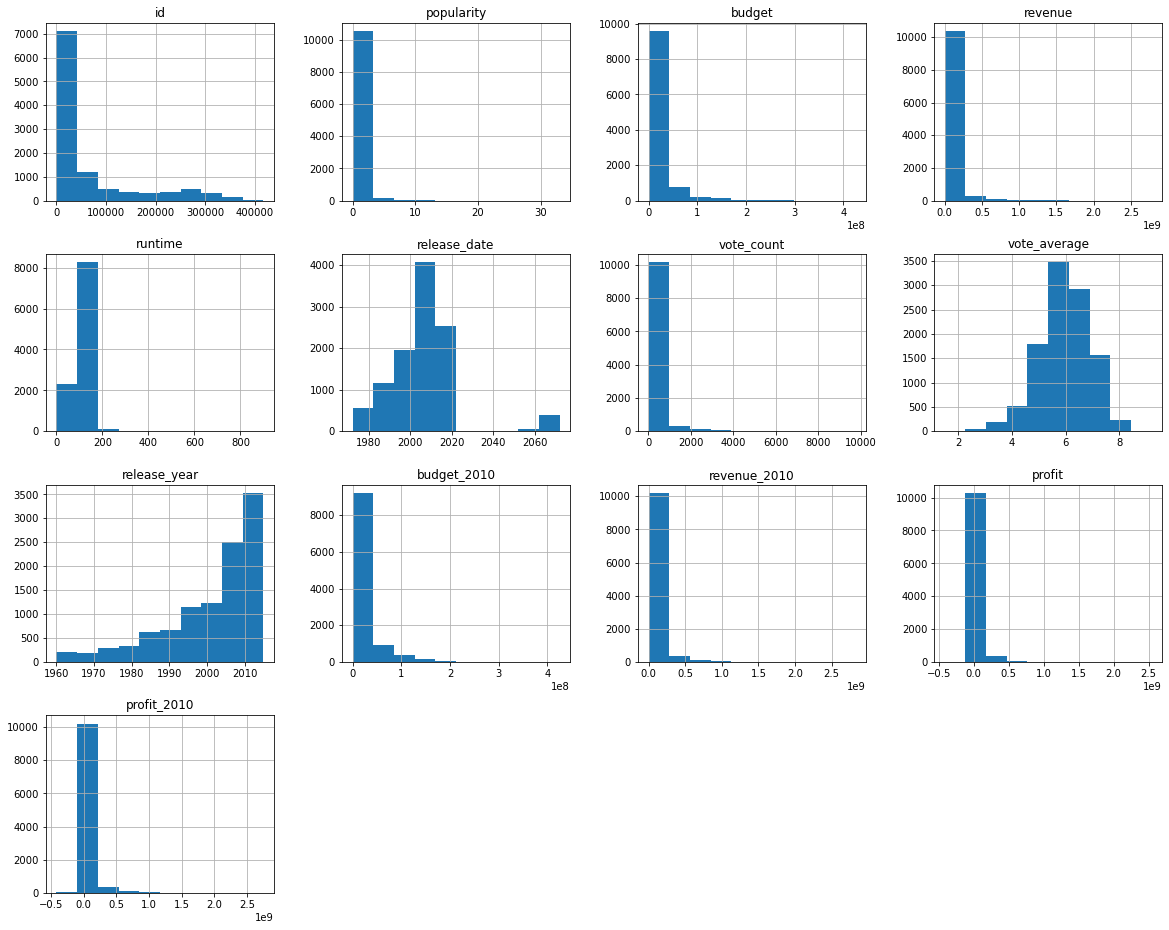

In [34]:
# Explore the general distribution of the data

df.hist(bins=10,figsize=(20,16));

### The Viz above immediately shows a trend in `release_year` and skewwed distributions in several other variables.

## Q1: Which movie titles had the highest revenue?


In [35]:
# Determine the top 10 movies by revenue generated in order

top10_rev = df[['original_title', 'revenue']].nlargest(10,'revenue')
top10_rev

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


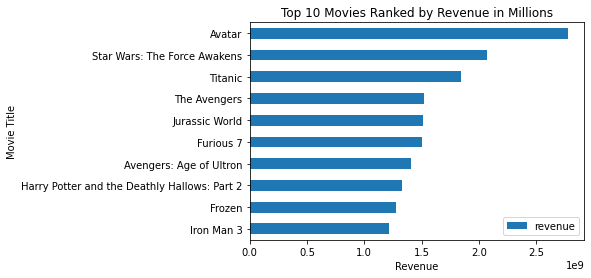

In [36]:
top10_rev.sort_values(by='revenue').set_index('original_title',).plot(kind='barh')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Ranked by Revenue in Millions');

### The Viz above shows the movie Avatar has had the highest revenue generated of all time. 

## Q2: Which movie titles had the highest profit?

In [37]:
# Determine the top 10 movies by profit generated in order

top10_prof = df[['original_title', 'profit']].nlargest(10,'profit')
top10_prof

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


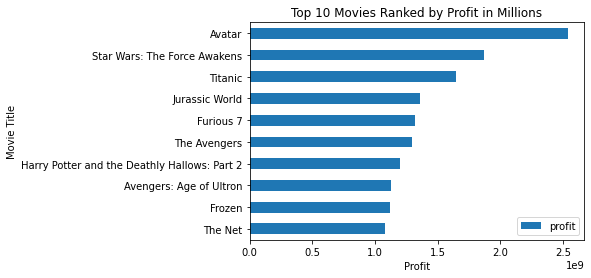

In [38]:
top10_prof.sort_values(by='profit').set_index('original_title',).plot(kind='barh')
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Ranked by Profit in Millions');

### The Viz above shows the movie Avatar has had the highest profit generated of all time. 

## Q3: Which companies have made the highest total profit from movies of all time?

In order to answer this question a new dataset will need to be created specifically highlighting the companies that produced these movie titles

In [39]:
# Copy the original dataset into a new one which will be maniupulated to showcase the companies and not individual movies

df_comp = df.copy()
df_comp

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00


Notice that a lot of movies are produced by more than one company. However, we want to examine each individual company. For this purpose we will go through some processes to manipulated our `df_comp` in order to showcase our objective.

NB: This is a typical example of **Data Wrangling** that occurs within **EDA**

###### Step 1:

Convert the values within the column `production_companies` into a list of strings 

In [40]:
# Split the production_companies column into a list of strings by its delimiter

df_comp['production_companies'] = df_comp['production_companies'].str.split('|')
df_comp.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


###### Step 2:

Recall we are examining metrics of individual company. Therefore we need to evalute the metrics of each individual company when involved in group projects

To do this we first create a list of the number of companies that were involved in the production of each individual movie.

In [41]:
# Use a for loop to create a list of the number of companies involved from an empty list

company_no = []
for i in df_comp['production_companies']:
    company_no.append(len(i));
    
company_no[:15]

[5, 2, 4, 3, 5, 5, 2, 5, 2, 3, 3, 4, 3, 2, 3]

In [42]:
# Ensure the number of rows in df_comp and the number of values in company_no are equal

print('The number of rows in df_comp is',df_comp.shape[0])
print('The number of values in company_no is',len(company_no))

The number of rows in df_comp is 10731
The number of values in company_no is 10731


The number of rows in `df_comp` and the number of values in `company_no` are equal. 

###### Step 3:

Assuming all companies in group projects contributed equally into the budget and shared revenue and profit equally, the value of these metric for each individual company will need to be calculated for each movie. For this, the total metrics will be divided by the number of companies involved for each movie to determine the value for each individual company.

In [43]:
# Test this procedure first by dividing the budget column by the company_no

df_comp['budget'] = df_comp['budget']/company_no
df_comp

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,3.000000e+07,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,7.500000e+07,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,2.750000e+07,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,6.666667e+07,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,3.800000e+07,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0.000000e+00,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,[Bruce Brown Films],2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10862,20379,0.065543,0.000000e+00,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,"[Cherokee Productions, Joel Productions, Dougl...",2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10863,39768,0.065141,0.000000e+00,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,[Mosfilm],2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10864,21449,0.064317,0.000000e+00,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,[Benedict Pictures Corp.],2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00


We have successfully evaluated the budget each company contributed for each movie. Now we will repeat this process for other metrics.

In [44]:
# Repaet the process for revenue, profit, budget_2010, revenue_2010, profit_2010

df_comp['revenue'] = df_comp['revenue']/company_no
df_comp['profit'] = df_comp['profit']/company_no
df_comp['budget_2010'] = df_comp['budget_2010']/company_no
df_comp['revenue_2010'] = df_comp['revenue_2010']/company_no
df_comp['profit_2010'] = df_comp['profit_2010']/company_no

df_comp

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
1,76341,28.419936,7.500000e+07,1.892182e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,"[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,6.899997e+07,1.740806e+08,1.142182e+08,1.050807e+08
2,262500,13.112507,2.750000e+07,7.380955e+07,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,"[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,2.529999e+07,6.790476e+07,4.630955e+07,4.260477e+07
3,140607,11.173104,6.666667e+07,6.893927e+08,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,"[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,6.133331e+07,6.342410e+08,6.227261e+08,5.729077e+08
4,168259,9.335014,3.800000e+07,3.012499e+08,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,"[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,3.495998e+07,2.771498e+08,2.632499e+08,2.421898e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0.000000e+00,0.000000e+00,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,[Bruce Brown Films],2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10862,20379,0.065543,0.000000e+00,0.000000e+00,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,"[Cherokee Productions, Joel Productions, Dougl...",2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10863,39768,0.065141,0.000000e+00,0.000000e+00,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,[Mosfilm],2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10864,21449,0.064317,0.000000e+00,0.000000e+00,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,[Benedict Pictures Corp.],2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


###### Step 4:

Explode the `production_companies` column. This means separating the list of companies so that each one would stand on its own and carry all its original attributes with it. Making each company would be stand on its own and it would carry every metric we have calculated for it along with itself as it separates from the list.

In [45]:
# Explode the production_companies column and inspect the new companies dataset

df_comp = df_comp.explode('production_companies',ignore_index = True)
df_comp.head(20)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
1,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
2,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
3,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
4,135397,32.985763,3.000000e+07,3.027058e+08,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,2015-06-09,5562,6.5,2015,2.759999e+07,2.784892e+08,2.727058e+08,2.508892e+08
5,76341,28.419936,7.500000e+07,1.892182e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,6.899997e+07,1.740806e+08,1.142182e+08,1.050807e+08
6,76341,28.419936,7.500000e+07,1.892182e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Kennedy Miller Productions,2015-05-13,6185,7.1,2015,6.899997e+07,1.740806e+08,1.142182e+08,1.050807e+08
7,262500,13.112507,2.750000e+07,7.380955e+07,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment,2015-03-18,2480,6.3,2015,2.529999e+07,6.790476e+07,4.630955e+07,4.260477e+07
8,262500,13.112507,2.750000e+07,7.380955e+07,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Mandeville Films,2015-03-18,2480,6.3,2015,2.529999e+07,6.790476e+07,4.630955e+07,4.260477e+07
9,262500,13.112507,2.750000e+07,7.380955e+07,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Red Wagon Entertainment,2015-03-18,2480,6.3,2015,2.529999e+07,6.790476e+07,4.630955e+07,4.260477e+07


###### Step 5:

Finally, group the dataset by `production_companies` and tabulate the information of the metric totals.

In [46]:
# Group the dataset and sum all fields

comp_info = df_comp.groupby('production_companies').sum()
comp_info

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
production_companies,,,,,,,,,,,,
,82190722,214.395885,750211841.0,445340399.0,93794,20256,5731.7,1922933,9.064113e+08,5.560161e+08,-304871442.0,-3.503952e+08
"""DIA"" Productions GmbH & Co. KG",8409,1.626534,9000000.0,11087731.5,109,152,5.7,2003,1.066817e+07,1.314287e+07,2087731.5,2.474698e+06
# Lexyn Productions,5677,0.468552,0.0,0.0,77,15,5.6,1984,0.000000e+00,0.000000e+00,0.0,0.000000e+00
10 West Studios,309425,0.245948,0.0,0.0,115,30,7.4,2015,0.000000e+00,0.000000e+00,0.0,0.000000e+00
100 Feet Productions,14098,0.595424,2000000.0,0.0,105,35,5.8,2008,2.025573e+06,0.000000e+00,-2000000.0,-2.025573e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
uFilm,1132786,7.113627,23400000.0,26687851.0,1089,1453,60.1,22120,2.208074e+07,2.587111e+07,3287851.0,3.790368e+06
uFund,106021,0.572327,2400000.0,0.0,100,172,5.5,2012,2.279386e+06,0.000000e+00,-2400000.0,-2.279386e+06
verture Films,12085,0.469922,0.0,0.0,104,78,5.9,2008,0.000000e+00,0.000000e+00,0.0,0.000000e+00


Now we have calculated our total metrics across companies, we can begin answering our questions.

**Which companies have made the highest total profit from movies of all time?**

In [47]:
# Determine the top 10 companies with the total of profits

top_comp_prof = comp_info['profit'].nlargest(10)
top_comp_prof

production_companies
Paramount Pictures                        1.284195e+10
Universal Pictures                        1.263313e+10
Warner Bros.                              1.170193e+10
Walt Disney Pictures                      1.032499e+10
Twentieth Century Fox Film Corporation    1.010609e+10
Columbia Pictures                         8.138918e+09
DreamWorks Animation                      6.015614e+09
New Line Cinema                           5.708504e+09
Marvel Studios                            5.353235e+09
Lucasfilm                                 4.572398e+09
Name: profit, dtype: float64

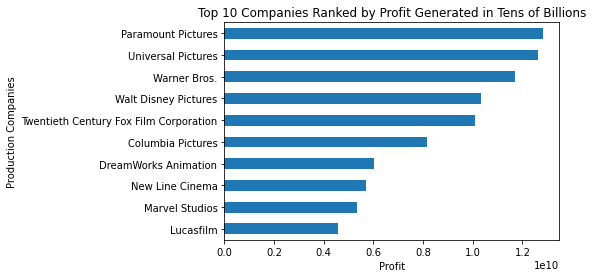

In [48]:
top_comp_prof.sort_values().plot(kind='barh')
plt.xlabel('Profit')
plt.ylabel('Production Companies')
plt.title('Top 10 Companies Ranked by Profit Generated in Tens of Billions');

### The Viz above shows that Paramount Pictures has made the most total profit of all time from their movies.

## Q4: Which companies have spent the highest total budget from movies of all time?

In [49]:
# Determine the top 10 companies with the total of budgets

top_comp_bud = comp_info['budget'].nlargest(10)
top_comp_bud

production_companies
Warner Bros.                              6.494378e+09
Universal Pictures                        5.808863e+09
Paramount Pictures                        5.570230e+09
Walt Disney Pictures                      5.149316e+09
Columbia Pictures                         4.878468e+09
Twentieth Century Fox Film Corporation    3.537941e+09
New Line Cinema                           2.761717e+09
DreamWorks Animation                      2.607750e+09
Touchstone Pictures                       2.501455e+09
Columbia Pictures Corporation             1.973708e+09
Name: budget, dtype: float64

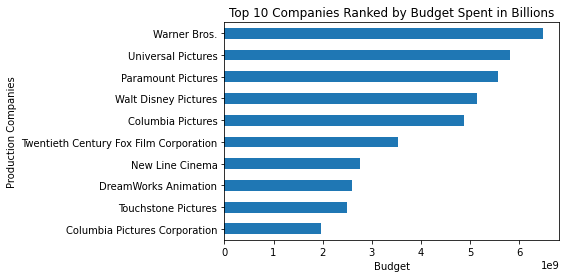

In [50]:
top_comp_bud.sort_values().plot(kind='barh')
plt.xlabel('Budget')
plt.ylabel('Production Companies')
plt.title('Top 10 Companies Ranked by Budget Spent in Billions');

### The Viz above shows that Warner Bros. has spent the most total budget of all time from their movies.

## Q5: Which movies are the most popular of all time?

In [51]:
# Print out list of movies based on popularity ratings in order

df[['original_title', 'popularity']].sort_values(by ='popularity', ascending=False)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
...,...,...
7268,Born into Brothels,0.001117
6961,Khosla Ka Ghosla!,0.001115
6551,Mon petit doigt m'a dit...,0.000973
6080,G.B.F.,0.000620


In [52]:
# Determine the top 10 most popular movies of all time in order

top_10_pm = df[['original_title', 'popularity']].nlargest(10,'popularity')
top_10_pm

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


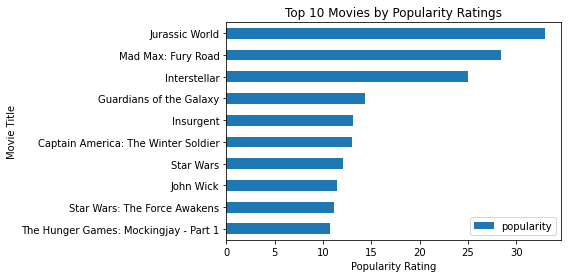

In [53]:
top_10_pm.set_index('original_title').sort_values(by='popularity').plot(kind ='barh')
plt.xlabel('Popularity Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Popularity Ratings');

### The Viz above shows that Jurassic World is the most popular movie of all time.

## Q6: Which directors are most sought after to make movies?

Before we can find information on each individual director, the `director` column must first be exploded like the `production_companies` was since some movies were co-directed or had more than one director.  
The initial dataset will need to be copied just as done before.

In [54]:
# Copy the original dataset into a new one which will be maniupulated to showcase the directors and not individual movies


df_direct = df.copy()

Now the dataset will be manipulated to highlight the directors. We will do this in a series of steps just as before.

###### Step 1:

Convert the values within the column `director` into a list of strings 

In [55]:
# Split the director column into a list of strings by its delimiter

df_direct['director'] = df_direct['director'].str.split('|')
df_direct.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,[George Miller],120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,[Robert Schwentke],119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,[J.J. Abrams],136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,[James Wan],137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09


###### Step 2:

Explode the `director` column.

In [56]:
# Explode the production_companies column and inspect the new companies dataset

df_direct = df_direct.explode('director',ignore_index = True)
df_direct.head(20)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,3.661143e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,2.627551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,4.483897e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,9.961120e+08
9,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,9.961120e+08


###### Step 3:

Finally, group the dataset by `director` and tabulate the average of the information determine each director's effect per movie.

In [57]:
# Group the dataset and average all fields

direct_info = df_direct.groupby('director').mean()
direct_info

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
director,,,,,,,,,,,,
FrÃ©dÃ©ric Jardin,79070.000000,0.434506,2500000.0,3358.0,98.000000,28.000000,5.9,2011.000000,2.423495e+06,3.255239e+03,-2496642.0,-2.420240e+06
A. Todd Smith,370687.000000,1.876037,0.0,0.0,0.000000,11.000000,5.4,2015.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00
A.R. Murugadoss,14070.000000,0.215030,9100000.0,76000000.0,183.000000,53.000000,6.9,2008.000000,9.216358e+06,7.697178e+07,66900000.0,6.775543e+07
Aaron Aites,36124.000000,0.108700,0.0,0.0,93.000000,13.000000,6.5,2008.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Aaron Blaise,10009.000000,1.653031,100000000.0,250.0,85.000000,753.000000,6.8,2003.000000,1.185353e+08,2.963382e+02,-99999750.0,-1.185350e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
Ã‡aÄŸan Irmak,13393.000000,0.265008,0.0,0.0,108.000000,12.000000,8.2,2005.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00
Ã‰mile Gaudreault,321.000000,0.276911,4361898.0,3031801.0,92.000000,13.000000,5.2,2003.000000,5.170387e+06,3.593753e+06,-1330097.0,-1.576634e+06
Ã‰ric Besnard,52349.000000,0.081724,0.0,0.0,100.000000,10.000000,5.1,2010.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00


Now to answer the questions.

**Which directors are most sought after to make movies?**  

These would be the directors involved in the most movies

In [58]:
# Determine the top 10 directors of the most movies

direct_most = df_direct['director'].value_counts().nlargest(10)
direct_most

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      30
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

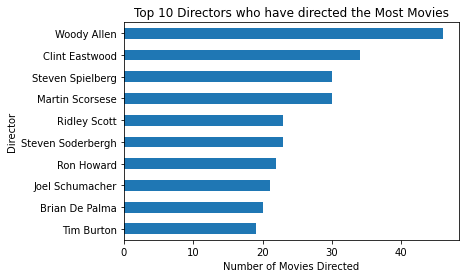

In [59]:
direct_most.sort_values().plot(kind='barh')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.title('Top 10 Directors who have directed the Most Movies');

### The Viz above shows that Woody Allen is the most sought after director.

## Q7: Are same these directors ususally associated with more popular movies?

In order to answer this we need to find the directors usually associated with popular movies

In [60]:
# Determine the top 10 director by average popularity rating

top_direct_pop = direct_info['popularity'].nlargest(10)
top_direct_pop

director
Colin Trevorrow       16.696886
Chad Stahelski        11.422751
David Leitch          11.422751
Juno John Lee          8.411577
Alan Taylor            6.883129
Peter Richardson       6.668990
Christopher Nolan      6.195521
Alex Garland           6.118847
Patrick Tatopoulos     5.806897
Wes Ball               5.553082
Name: popularity, dtype: float64

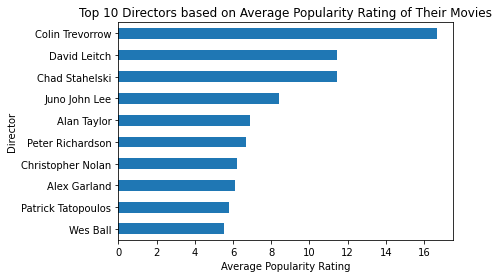

In [61]:
top_direct_pop.sort_values().plot(kind='barh')
plt.xlabel('Average Popularity Rating')
plt.ylabel('Director')
plt.title('Top 10 Directors based on Average Popularity Rating of Their Movies');

As we can see these from the Viz above these 'popular' are not really sought after. In that case,  




**How many movies have these 'popular' directors actually directed?**

In [62]:
# Determine how many movies the top popular directors have directed

df_direct['director'].value_counts()[top_direct_pop.index]

director
Colin Trevorrow        2
Chad Stahelski         1
David Leitch           1
Juno John Lee          1
Alan Taylor            2
Peter Richardson       1
Christopher Nolan     10
Alex Garland           1
Patrick Tatopoulos     1
Wes Ball               2
Name: director, dtype: int64

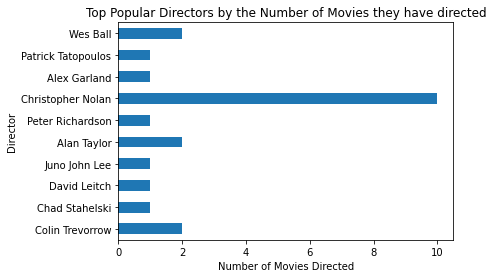

In [63]:
df_direct['director'].value_counts()[top_direct_pop.index].plot(kind='barh')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.title('Top Popular Directors by the Number of Movies they have directed');

Now let's look at the Viz above on the same scale as that of the chart with the directors with the most movies

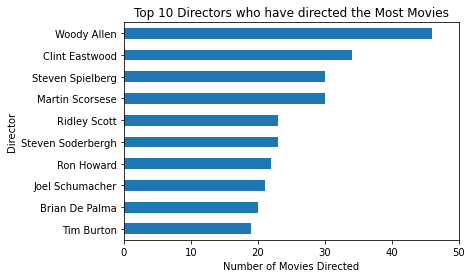

In [64]:
direct_most.sort_values().plot(kind='barh')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.xlim(0,50)
plt.title('Top 10 Directors who have directed the Most Movies');

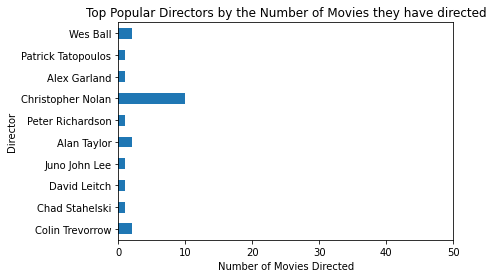

In [65]:
df_direct['director'].value_counts()[top_direct_pop.index].plot(kind='barh')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.xlim(0,50)
plt.title('Top Popular Directors by the Number of Movies they have directed');

### The Vizes above show that the most popular movies are not usualy directed by the most sought after directors and directors in charge of such movies are not involved in that many movies

## Q8: What is the trend in movie popularity over the years?

In [66]:
# Determine the average yearly popularity rating of movies in general

yearly_pop = df.groupby('release_year').popularity.mean()
yearly_pop.head()

release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
Name: popularity, dtype: float64

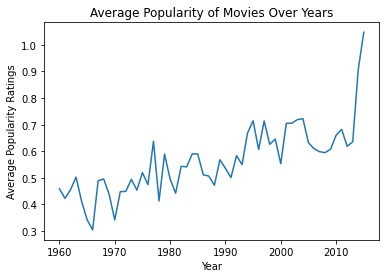

In [67]:
yearly_pop.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Popularity Ratings')
plt.title('Average Popularity of Movies Over Years');

### The Viz above shows movies gradually become more popular as the years progress.

## Q9: Is there a correlation between vote_average and profit?

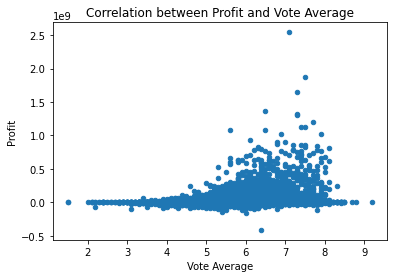

In [68]:
# Visualize a scatter_plot between Vote_average and profit

df.plot(x='vote_average', y='profit',kind='scatter')
plt.xlabel('Vote Average')
plt.ylabel('Profit')
plt.title('Correlation between Profit and Vote Average');

### The Viz above shows that there is no correlation between Vote Average and Profit

## Q10: What kinds of properties are associated with the more profitable movies?

In order to answer this question let us check which attributes are closely related to profit by checking the correlation coefficient of `profit` with all other columns

In [69]:
# Check the correlation coefficient of profit with all other columns

df.corr().profit.sort_values(ascending=False)

profit          1.000000
revenue         0.976173
revenue_2010    0.914097
profit_2010     0.906331
vote_count      0.755681
popularity      0.628699
budget          0.569730
budget_2010     0.545120
vote_average    0.188220
runtime         0.137497
release_year    0.033486
id             -0.073557
Name: profit, dtype: float64

Ignoring all 2010 columns since they are related to other columns, we will consider all columns with a correlation coefficient greater than **0.5** for this analysis.

#### Define profitable movies

In [70]:
#Print average profit gnerated by movies

df['profit'].mean()

25516241.443947442

In [71]:
#Print dataframe where profit >= average profit (high profit)

high_prof = df.query('profit >= 25516241.443947442')
high_prof

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810,1.254446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.101614e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.704191e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225,1.718723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,1.210949e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,11455,0.608679,0,41590893,Up in Smoke,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,Paramount Pictures,1978-01-01,103,6.5,1978,0.000000e+00,1.390259e+08,41590893,1.390259e+08
10770,11327,0.512719,2300000,35000000,Midnight Express,Brad Davis|Irene Miracle|Bo Hopkins|Randy Quai...,Alan Parker,121,Drama|Crime,Columbia Pictures|Casablanca Filmworks,1978-10-06,141,7.5,1978,7.688212e+06,1.169945e+08,32700000,1.093063e+08
10771,123,0.496029,4000000,30471420,The Lord of the Rings,Christopher Guard|William Squire|Michael Schol...,Ralph Bakshi,132,Drama|Animation|Adventure,Fantasy Films,1978-11-15,91,6.0,1978,1.337080e+07,1.018568e+08,26471420,8.848603e+07
10819,16214,0.044675,0,78000000,Hooper,Burt Reynolds|Robert Klein|Adam West|Jan-Micha...,Hal Needham,107,Action|Comedy,Warner Bros.,1978-07-28,13,6.0,1978,0.000000e+00,2.607307e+08,78000000,2.607307e+08


In [72]:
#Print dataframe where profit < average profit (low profit)

low_prof = df.query('profit < 25516241.443947442')
low_prof

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_2010,revenue_2010,profit,profit_2010
11,76757,6.189369,176000003,183987723,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2015-02-04,1937,5.2,2015,1.619199e+08,1.692686e+08,7987720,7.348699e+06
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854,7.6,2015,1.379999e+07,3.391985e+07,21869414,2.011985e+07
20,158852,5.462138,190000000,209035668,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,Brad Bird,130,Action|Family|Science Fiction|Adventure|Mystery,Walt Disney Pictures|Babieka|A113,2015-05-19,1899,6.2,2015,1.747999e+08,1.923127e+08,19035668,1.751281e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.000000e+00,2.056620e+07,22354572,2.056620e+07
38,241554,3.237370,50000000,71561644,Run All Night,Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...,Jaume Collet-Serra,114,Action|Crime|Drama|Mystery|Thriller,Vertigo Entertainment|Energy Entertainment|Rat...,2015-03-11,814,6.3,2015,4.599998e+07,6.583668e+07,21561644,1.983670e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0,0.000000e+00


Now let us visualize each variable in relation to `profit` and check if they are more associated with movies of low profit or high profit

#### Which variables are related to profit?

##### Revenue?

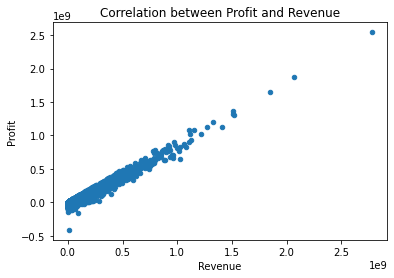

In [73]:
df.plot(x='revenue', y='profit',kind='scatter')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.title('Correlation between Profit and Revenue');

### The Viz above shows revenue is very closely related with profit.  

#### What other variables could be related?

##### Vote Count?

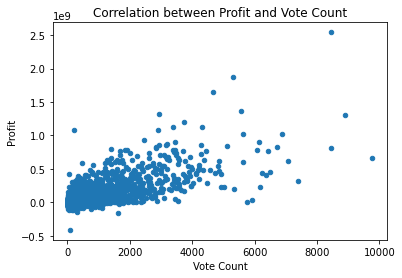

In [74]:
df.plot(x='vote_count', y='profit',kind='scatter')
plt.xlabel('Vote Count')
plt.ylabel('Profit')
plt.title('Correlation between Profit and Vote Count');

### The scatterplot above shows no correlation between vote count and profit. This implies that vote count is not a deciding factor in profit generated by a movie, it cannot be used to determine if a movie will generate high profit or not.

Still, let us see if movies with higher vote count are more associated with movies of high or low profit

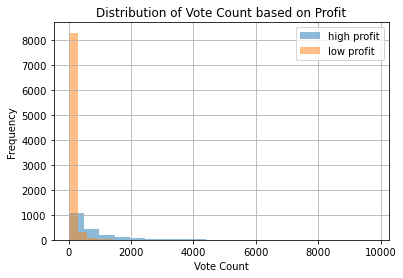

In [75]:
# Visualize results to explain better.

high_prof['vote_count'].hist(alpha=0.5, bins=20, label='high profit')
low_prof['vote_count'].hist(alpha=0.5, bins =20, label='low profit')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Vote Count based on Profit');

### From the Viz above, although Vote Count and Profit are not related, high profit movies generally have higher Vote Count

##### Popularity?

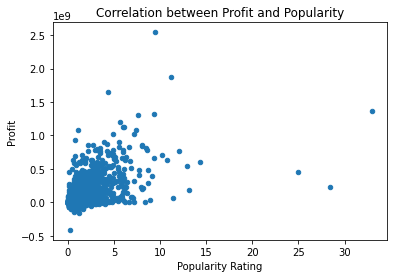

In [76]:
df.plot(x='popularity', y='profit',kind='scatter')
plt.xlabel('Popularity Rating')
plt.ylabel('Profit')
plt.title('Correlation between Profit and Popularity');

### The scatterplot above shows no correlation between popularity and profit. This implies that popularity is not a deciding factor in profit generated by a movie, it cannot be used to determine if a movie will generate high profit or not.

Still, let us see if movies with higher popularity are more associated with movies of high or low profit

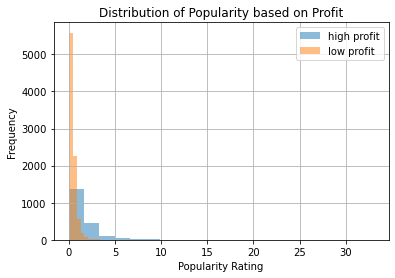

In [77]:
# Visualize results to explain better.

high_prof['popularity'].hist(alpha=0.5, bins=20, label='high profit')
low_prof['popularity'].hist(alpha=0.5, bins =20, label='low profit')
plt.xlabel('Popularity Rating')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Popularity based on Profit');

### From the Viz above, although Popularity and Profit are not related, high profit movies generally have higher Popularity

##### Budget?

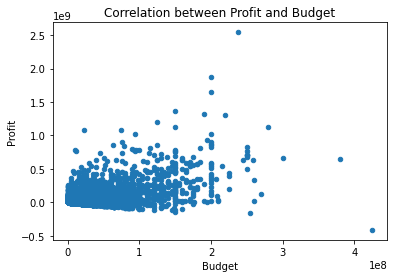

In [78]:
df.plot(x='budget', y='profit',kind='scatter')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Correlation between Profit and Budget');

### The scatterplot above shows little to no correlation between budget and profit. This implies that budget, although related, is not a deciding factor in profit generated by a movie, it cannot be used to determine if a movie will generate high profit or not.

Still, let us see if movies with higher budget are more associated with movies of high or low profit

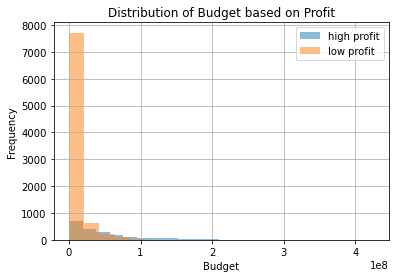

In [79]:
# Visualize results to explain better.

high_prof['budget'].hist(alpha=0.5, bins=20, label='high profit')
low_prof['budget'].hist(alpha=0.5, bins =20, label='low profit')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Budget based on Profit');

### From the Viz above, although Budget and Profit are not strongly related, high profit movies generally have higher Budget

## Q11: Given the budget of movies at when it was made and its values as at 2010, is the economy getting better or worse for the movie industry? Is it affecting the profit made by movies compared to their value as at 2010?

To check the yearly economy of the movie industry we will first extract each year and different average metrics for each year

In [80]:
# Collect average metrics for each year and group them by release_year

yearly_info = df[['release_year','budget','budget_2010','revenue','revenue_2010','profit','profit_2010']].groupby('release_year').mean()
yearly_info

,budget,budget_2010,revenue,revenue_2010,profit,profit_2010
release_year,,,,,,
1960,6.892796e+05,5.082036e+06,4.531406e+06,3.340991e+07,3.842127e+06,2.832787e+07
1961,1.488290e+06,1.085687e+07,1.089420e+07,7.947167e+07,9.405909e+06,6.861480e+07
1962,1.710066e+06,1.232693e+07,6.736870e+06,4.856238e+07,5.026804e+06,3.623546e+07
1963,2.156809e+06,1.535687e+07,5.511911e+06,3.924580e+07,3.355103e+06,2.388893e+07
1964,9.400753e+05,6.608980e+06,8.118614e+06,5.707603e+07,7.178539e+06,5.046705e+07
1965,2.005860e+06,1.388168e+07,1.308805e+07,9.057670e+07,1.108219e+07,7.669502e+07
1966,1.251191e+06,8.405522e+06,1.842102e+06,1.237527e+07,5.909106e+05,3.969746e+06
1967,2.648737e+06,1.731417e+07,1.941670e+07,1.269224e+08,1.676796e+07,1.096082e+08
1968,1.893132e+06,1.186797e+07,6.966657e+06,4.367372e+07,5.073526e+06,3.180575e+07


## Now let's visualize the difference between the value of budgets at each year and at 2010 in dollars.

To make our visualisations we will plot multiple line graphs comparing values. In order to make this easier and avoid repetitive code we will we will create a fucntion specifically to compare our yearly metrics with their 2010 counterparts

In [81]:
def compare_graph(metric, value_2010, metric_name):
    metric.plot(kind='line', label='value at year')
    value_2010.plot(kind='line', label='value at 2010')
    plt.xlabel('Year')
    plt.ylabel(metric_name.title())
    plt.legend()
    plt.title(print('Comparison of Yearly Average', metric_name.title(),  'for Movies And 2010 Value'));

**NB**: The use of the `compare_graph` fuction is as follows `compare_graph(metric, value_2010, metric_name)`  
    
 * metric - vector, list or column variable to compare 
 * value_2010 - corresponding 2010 value of metric to compare
 * metric_name - the name of the metric or variable the fuction should carry (this should be a string)

Now to ensure that our `compare_graph` fuction works properly let us test it with the `revenue` and its 2010 value

Comparison of Yearly Average Revenue for Movies And 2010 Value


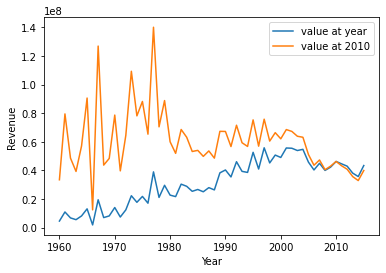

In [82]:
compare_graph(yearly_info['revenue'],yearly_info['revenue_2010'],'revenue')

**The function works!**  
Now we can make our plots to answer the qusetion 

#### Given the budget of movies at when it was made and its values as at 2010, is the economy getting better or worse for the movie industry? Is it affecting the profit made by movies compared to their value as at 2010?

Visualize the comparisons of `budget` and `profit` with thier value at 2010 with the function that was created

We will start by visualizing the difference between the value of budgets at each year and at 2010 in dollars

Comparison of Yearly Average Budget for Movies And 2010 Value


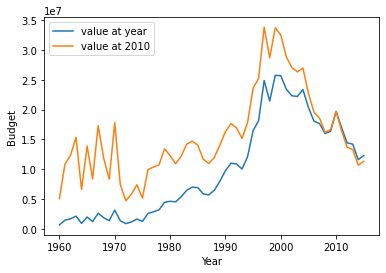

In [83]:
# Visualize comparison graphs for budget

compare_graph(yearly_info['budget'],yearly_info['budget_2010'],'budget')

Now let's visualize the difference between the value of profits at each year and at 2010 in dollars.

Comparison of Yearly Average Profit for Movies And 2010 Value


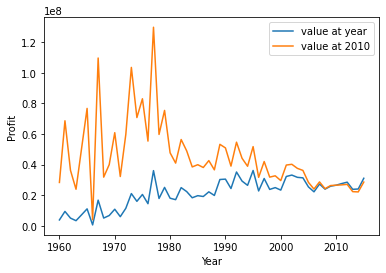

In [84]:
# Visualize comparison graphs for profit

compare_graph(yearly_info['profit'],yearly_info['profit_2010'],'profit')

### From the linegraphs above, the economy is getting worse as the value of budget in previous years is worth less as the years progress into 2010. It also seems that it gets worse after 2010 as the yearly value starts to become worth more.

### From the linegraphs above, the movie industry seems to remain unaffected by the economy as the value of profit seems to always adapt based on the economy

<a id='conclusions'></a>
## Conclusions

1. Avatar, Star Wars: The Force Awakens and Titanic were the movies that have generated the highest revenue.
2. Avatar, Star Wars: The Force Awakens and Titanic were the movies that generated the most profit.
3. Paramount Pictures, Universal Pictures and Warner Bros. were the production companies that have generated the most profit from their movies
4. Warener Bros. Universal Pictures and Paramount Pictures were the production companies that have spent the most budget for their movies
5. Jurassic World is the most popular movie of all time
6. Woody Allen, Clint eastwood and Steven Speilberg are the directors most sought after and have directed the most movies
7. The most sought after directors are not usually responsible for popular movies as the most actually popular directors have quite few movies compared to those most sought after
8. Movies seem to be getting more popular and higher pupularity ratings as time moves on
9. Profitability of movies is quite complex as it is affected by a lot of factors at once. The strongest factor seems to be revenue however further analysis will need to be done to determine why and determine the factors revenue is affected by.
10. Although little to no correlation exists between them, high profit movies usually have higher vote counts, budgets and popularity ratings.
11. The economy seems to be getting worse as inflation affects the value of the U.S. dollar. However, this seems to have little to no effect on the movie industry as the value of profits generated and budgets spents appear to adapt based on th current economy.


## Limitations
1. Ironman 3 has some of the highest revenues but not the highest profits
2. The Net has some of the highest profits but not the highest revenues
3. Marvel Studios and Lucasfilms are some of the biggest spenders budget-wise but don't generate some of the highest profits
4. Touchstone Pictures and Columbia Pictures Corperation are some of the biggest profiters but aren't some of the biggest spenders
5. Very large appearance of zero values in the `budget` and `revenue` columns


## Submitting your Project 



In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1